In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_csv(r"C:\Users\HP\Documents\mihir project\Real-Estate-Recommendation mlflow\data\processed_real_estate_data.csv")
df.head()

,Unnamed: 0,Builder Name,State,District,Location,Highway (mtrs),Railway (mtrs),Metro (mtrs),Bus Stop (mtrs),Closest Educational Institute Distance (m),...,Parking,Price per sq feet,Total price (approx),Gym,Swimming pool,Garden,Yoga area,Play area,Shopping area,ATM/Finance
0,0,Dem Phoenix,Maharastra,Mumbai,0.0,900,2000,1000,1000.0,1000.0,...,1,20560,7771680,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1,Dem Phoenix,Maharastra,Mumbai,0.0,900,2000,1000,1000.0,1000.0,...,1,20560,11719200,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,2,Dem Phoenix,Maharastra,Mumbai,0.0,900,2000,1000,1000.0,1000.0,...,1,20560,11061280,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,3,Dem Phoenix,Maharastra,Mumbai,0.0,900,2000,1000,1000.0,1000.0,...,1,20560,10691200,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,4,Dem Phoenix,Maharastra,Mumbai,0.0,900,2000,1000,1000.0,1000.0,...,1,20560,7771680,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [59]:
df.columns

Index(['Unnamed: 0', 'Builder Name', 'State', 'District', 'Location',
       'Highway (mtrs)', 'Railway (mtrs)', 'Metro (mtrs)', 'Bus Stop (mtrs)',
       'Closest Educational Institute Distance (m)',
       'Closest Hospital Distance (m)', 'Closest Mall Distance (m)',
       'Closest Business Park distance (m)', 'Flat number', 'Flat type (bhk)',
       'Area ', 'No. of bathrooms', 'Parking', 'Price per sq feet',
       'Total price (approx)', 'Gym', 'Swimming pool', 'Garden', 'Yoga area',
       'Play area', 'Shopping area', 'ATM/Finance'],
      dtype='object')

In [60]:
df=df.sample(frac=1)

In [61]:
df = df.iloc[:,1:]

In [62]:
df.drop(["Builder Name", "State", "District", "Flat number", "Yoga area", "Garden", "Play area", "Parking", "Gym"], axis=1, inplace=True)

In [63]:
df = df[df['Flat type (bhk)'] != 'REFUGE']
df = df[df['Area '] != 'REFUGE']
df = df[df['No. of bathrooms'] != 'REFUGE']
df = df[df['Price per sq feet'] != 'REFUGE']
df = df[df['Total price (approx)'] != 'REFUGE']

In [64]:
df

,Location,Highway (mtrs),Railway (mtrs),Metro (mtrs),Bus Stop (mtrs),Closest Educational Institute Distance (m),Closest Hospital Distance (m),Closest Mall Distance (m),Closest Business Park distance (m),Flat type (bhk),Area,No. of bathrooms,Price per sq feet,Total price (approx),Swimming pool,Shopping area,ATM/Finance
810,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1278,3,31100,39745800,1.0,1.0,1.0
1020,3.0,2000,2000,2600,500.0,20.0,150.0,500.0,1800.0,1,409,2,24750,10122750,0.0,0.0,1.0
817,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1278,3,31250,39937500,1.0,1.0,1.0
857,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1695,3,32300,54748500,1.0,1.0,1.0
356,1.0,200,1500,1900,450.0,1400.0,2800.0,500.0,4500.0,3,1051,3,29800,38643340,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,200,1500,1900,450.0,1400.0,2800.0,500.0,4500.0,2,831,2,28400,27095140,1.0,1.0,0.0
1021,3.0,2000,2000,2600,500.0,20.0,150.0,500.0,1800.0,2,702,2,24750,17374500,0.0,0.0,1.0
734,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1320,3,29400,38808000,1.0,1.0,1.0
52,0.0,900,2000,1000,1000.0,1000.0,1900.0,1800.0,3800.0,1,378,1,21500,8127000,0.0,0.0,0.0


In [65]:
df.shape

(1034, 17)

#### 

In [66]:
df.dropna()

,Location,Highway (mtrs),Railway (mtrs),Metro (mtrs),Bus Stop (mtrs),Closest Educational Institute Distance (m),Closest Hospital Distance (m),Closest Mall Distance (m),Closest Business Park distance (m),Flat type (bhk),Area,No. of bathrooms,Price per sq feet,Total price (approx),Swimming pool,Shopping area,ATM/Finance
810,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1278,3,31100,39745800,1.0,1.0,1.0
1020,3.0,2000,2000,2600,500.0,20.0,150.0,500.0,1800.0,1,409,2,24750,10122750,0.0,0.0,1.0
817,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1278,3,31250,39937500,1.0,1.0,1.0
857,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1695,3,32300,54748500,1.0,1.0,1.0
356,1.0,200,1500,1900,450.0,1400.0,2800.0,500.0,4500.0,3,1051,3,29800,38643340,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,200,1500,1900,450.0,1400.0,2800.0,500.0,4500.0,2,831,2,28400,27095140,1.0,1.0,0.0
1021,3.0,2000,2000,2600,500.0,20.0,150.0,500.0,1800.0,2,702,2,24750,17374500,0.0,0.0,1.0
734,2.0,0,1700,0,0.0,1300.0,1800.0,0.0,2300.0,3,1320,3,29400,38808000,1.0,1.0,1.0
52,0.0,900,2000,1000,1000.0,1000.0,1900.0,1800.0,3800.0,1,378,1,21500,8127000,0.0,0.0,0.0


In [67]:
object_columns = []
for i in range(0, len(df.columns)):
    if df.iloc[:,i].dtype == 'object':
        object_columns.append(df.iloc[:,i].name)
        print(df.iloc[:,i].dtype)

object
object
object
object
object


In [68]:
for i in object_columns:
  df[i] = pd.to_numeric(df[i])

In [69]:
df.dtypes

Location                                      float64
Highway (mtrs)                                  int64
Railway (mtrs)                                  int64
Metro (mtrs)                                    int64
Bus Stop (mtrs)                               float64
Closest Educational Institute Distance (m)    float64
Closest Hospital Distance (m)                 float64
Closest Mall Distance (m)                     float64
Closest Business Park distance (m)            float64
Flat type (bhk)                                 int64
Area                                            int64
No. of bathrooms                                int64
Price per sq feet                               int64
Total price (approx)                            int64
Swimming pool                                 float64
Shopping area                                 float64
ATM/Finance                                   float64
dtype: object

#### Analysing target variable

In [70]:
df['Total price (approx)'].describe()

count    1.034000e+03
mean     2.920528e+07
std      1.402366e+07
min      7.771680e+06
25%      1.503960e+07
50%      2.750234e+07
75%      3.861000e+07
max      6.431010e+07
Name: Total price (approx), dtype: float64

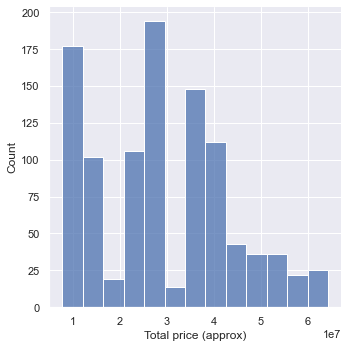

In [71]:
#histogram
sns.displot(df['Total price (approx)'])

In [72]:
#skewness and kurtosis
print("Skewness: %f" % df['Total price (approx)'].skew())
print("Kurtosis: %f" % df['Total price (approx)'].kurt())

Skewness: 0.342155
Kurtosis: -0.607665


#### Relationship with numerical variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Area ', ylabel='Total price (approx)'>

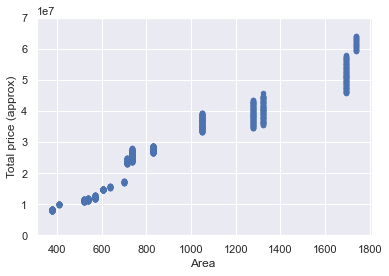

In [73]:
## scatter plot area/price
var = 'Area '
data = pd.concat([df['Total price (approx)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Total price (approx)', ylim=(0,70000000))

Area and Price are having linear relationship

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Price per sq feet', ylabel='Total price (approx)'>

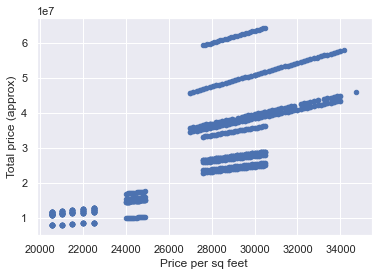

In [74]:
# scatter plot price per sq ft/ Total price
var='Price per sq feet'
data = pd.concat([df['Total price (approx)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Total price (approx)')

price per sq ft and Total price Strong linear (exponenetial?) relationship

### Relationship with categorical features

(-0.5, 3.5, 0.0, 70000000.0)

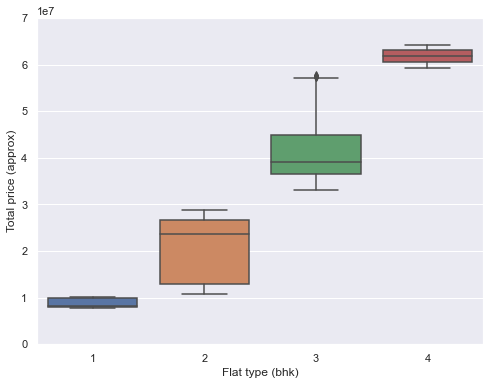

In [75]:
# box plot flat type/Total price
var = 'Flat type (bhk)'
data = pd.concat([df['Total price (approx)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='Total price (approx)', data=data)
fig.axis(ymin=0, ymax=70000000)

Flat type affects the Total price hugely

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

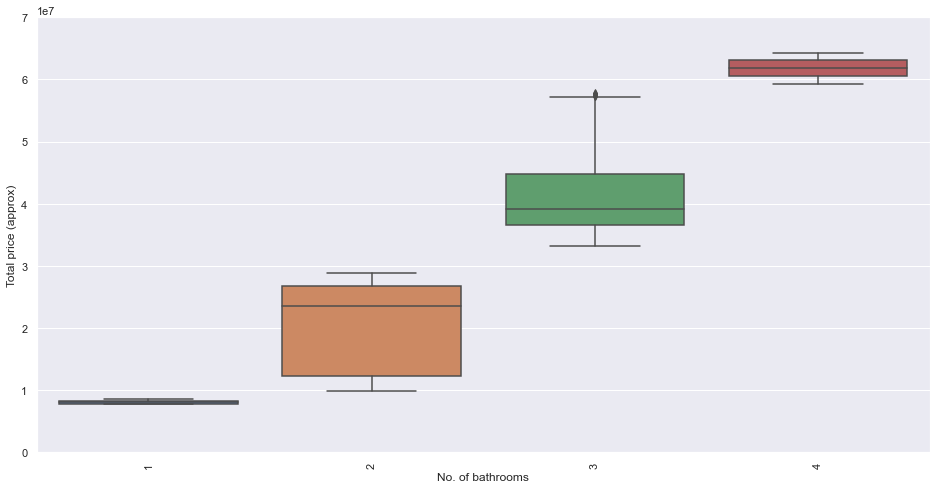

In [76]:
var = 'No. of bathrooms'
data = pd.concat([df['Total price (approx)'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Total price (approx)", data=data)
fig.axis(ymin=0, ymax=70000000)
plt.xticks(rotation=90)

No of Bathrooms also affects the Total price

From the above analysis we conclude that
 * Numerical features
 -> Both the features are linearly dependent on the Total price with price per sq ft is almost exponential.
 * categorical features
 -> Flat type is more affecting the price then no of bathrooms

#### Analysing rest of the features

* Correlation matrix (heatmap)
* 'Total price' correlation matrix (zoomed heatmap)
* Scatter plots between the most correlated variables

<AxesSubplot:>

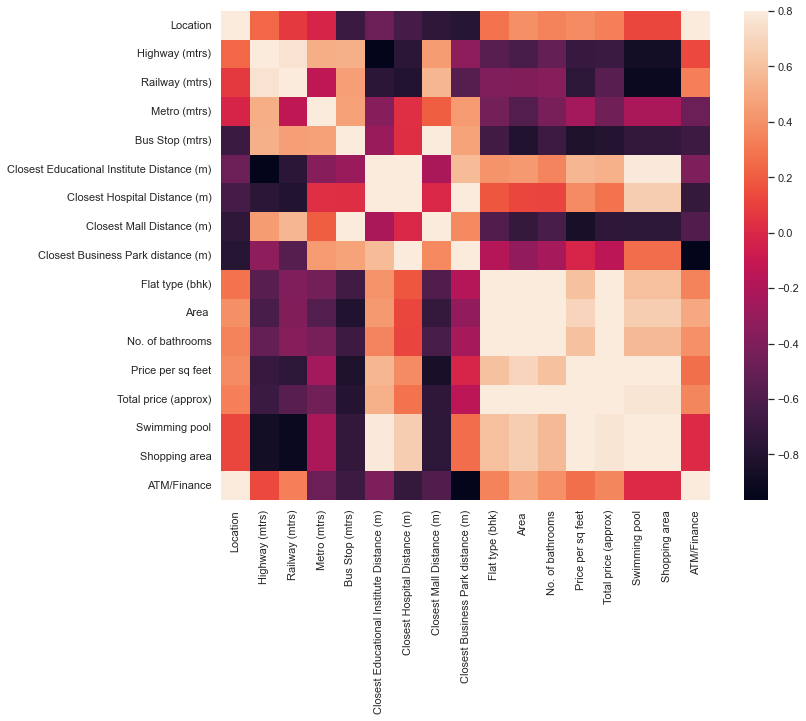

In [77]:
#Correlation matrix (heatmap)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Index(['Total price (approx)', 'Area ', 'Flat type (bhk)', 'No. of bathrooms',
       'Price per sq feet', 'Swimming pool', 'Shopping area',
       'Closest Educational Institute Distance (m)', 'ATM/Finance',
       'Location'],
      dtype='object')


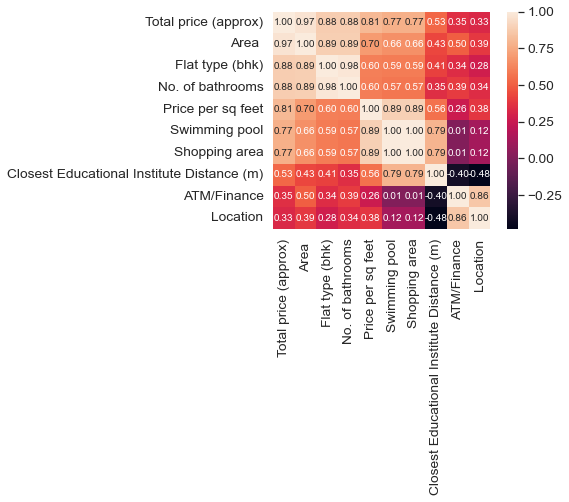

In [78]:
# 'Total price' correlation matrix (zoomed heatmap)
k=10 #number of variabeles for heatmap
cols = corrmat.nlargest(k, 'Total price (approx)')['Total price (approx)'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* Area,  Price per sq feet are strongly correlated
* (No. of bathrooms, Flat type (bhk)), (Swimming pool, shopping area) are also strongly correlated but they are multi collinear therefore we will only choose on of them.
* ATM and Location are also seems to be same therefore we will only consider one.

c:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


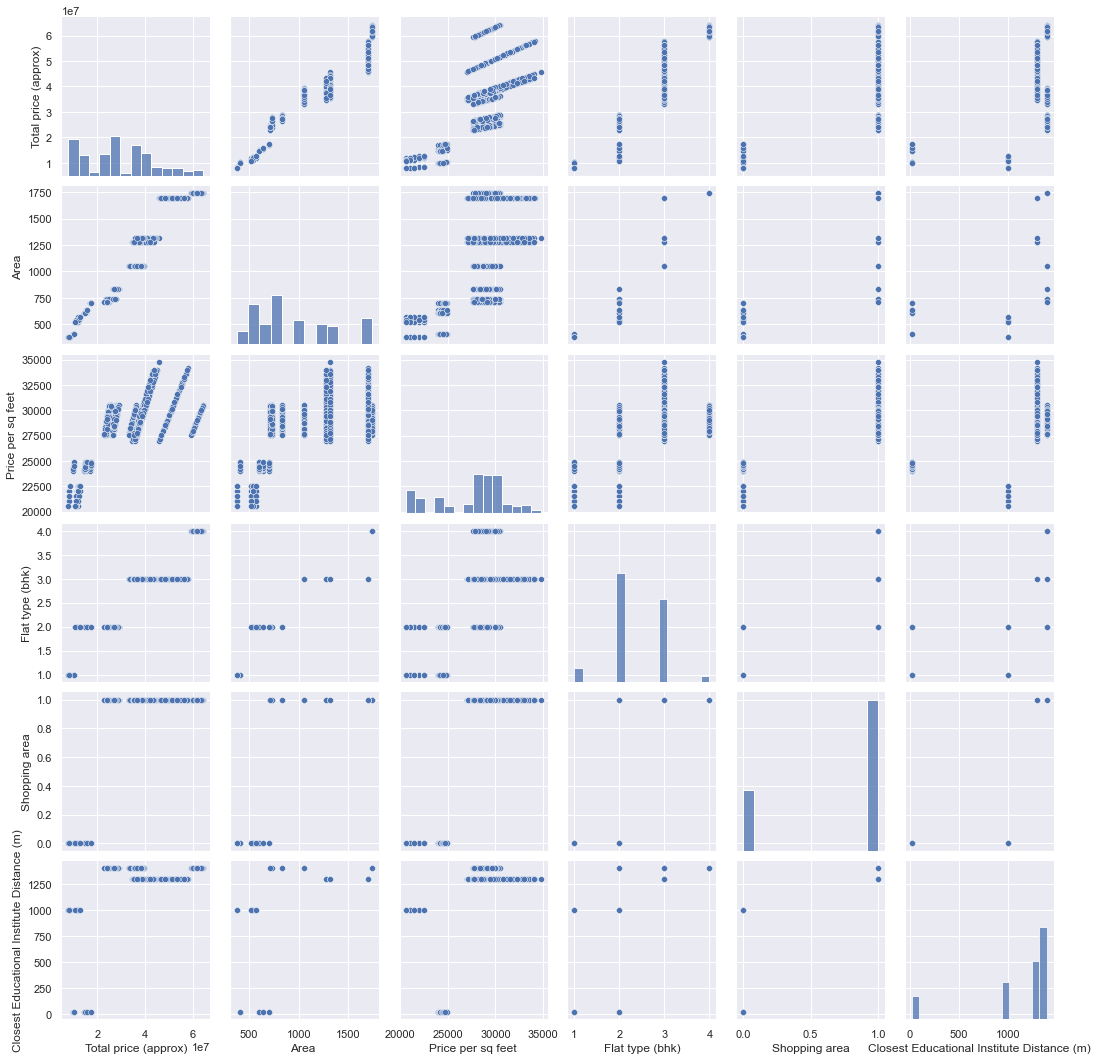

In [79]:
# Scatter plots between 'Total price' and correlated variables
sns.set_theme()
cols = ['Total price (approx)', 'Area ', 'Price per sq feet', 'Flat type (bhk)', 'Shopping area', 'Closest Educational Institute Distance (m)']
sns.pairplot(df[cols], size = 2.5)
plt.show()

#### Missing data

In [80]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Location,0,0.0
Flat type (bhk),0,0.0
Shopping area,0,0.0
Swimming pool,0,0.0
Total price (approx),0,0.0
Price per sq feet,0,0.0
No. of bathrooms,0,0.0
Area,0,0.0
Closest Business Park distance (m),0,0.0
Highway (mtrs),0,0.0


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. But in our case we do not have any missing data

#### Out liars
Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'Total price' and a set of scatter plots.

##### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [81]:
total_price_scaled = StandardScaler().fit_transform(np.array(df['Total price (approx)']).reshape(-1,1))
low_range = total_price_scaled[total_price_scaled[:, 0].argsort()][:10]
high_range = total_price_scaled[total_price_scaled[:, 0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.52912737]
 [-1.52912737]
 [-1.52912737]
 [-1.52912737]
 [-1.52912737]
 [-1.52912737]
 [-1.52912737]
 [-1.52912737]
 [-1.52912737]
 [-1.52912737]]

outer range (high) of the distribution:
[[2.39274498]
 [2.40515858]
 [2.41757218]
 [2.42998579]
 [2.44239939]
 [2.45481299]
 [2.4672266 ]
 [2.4796402 ]
 [2.4920538 ]
 [2.5044674 ]]


How 'Total Price' looks:

* Low range valyes are similar not too far from 0
* High range values are little bit far.

##### Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Area ', ylabel='Total price (approx)'>

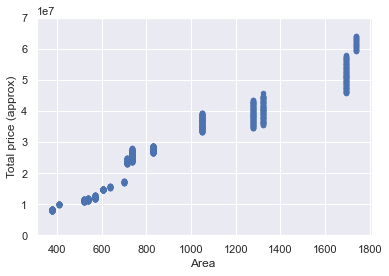

In [82]:
# bivariate analysis totalprice/area
var = 'Area '
data = pd.concat([df['Total price (approx)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Total price (approx)', ylim=(0,70000000))

No outliers present here

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Price per sq feet', ylabel='Total price (approx)'>

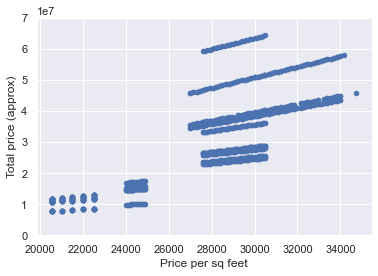

In [83]:
var = 'Price per sq feet'
data = pd.concat([df['Total price (approx)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Total price (approx)', ylim=(0,70000000))

We test some assumptions 

* Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'Total price' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* Homoscedasticity - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* Linearity - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

Search of Normality

For testing Normality
* Histogram -> Kurtosis and skewness.
* Nomal Probability plot -> Data distribution should closely follow the diagonal that represents the normal distribution.

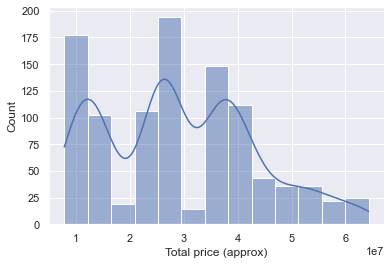

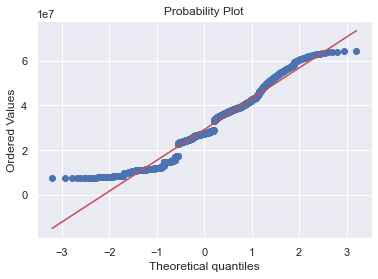

In [84]:
# histogram and normal probability plot
sns.histplot(df['Total price (approx)'], kde=True)
fig = plt.figure()
res = stats.probplot(df['Total price (approx)'], plot=plt)

As the it is positive skewed we will use simple data transformation  in case of positive skewness, log transformations usually works well.


In [85]:
df['Total price (approx)'] = np.log(df['Total price (approx)'])

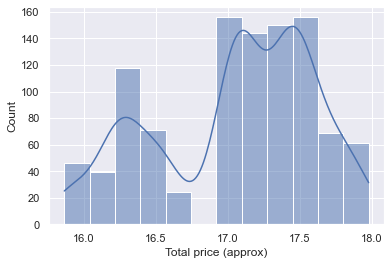

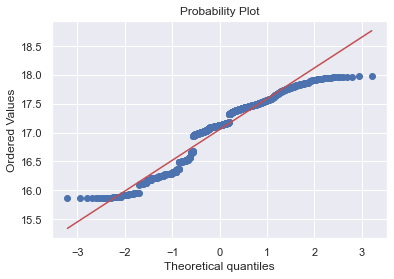

In [86]:
#transformed histogram and normal probability plot
sns.histplot(df['Total price (approx)'], kde=True)
fig = plt.figure()
res = stats.probplot(df['Total price (approx)'], plot=plt)

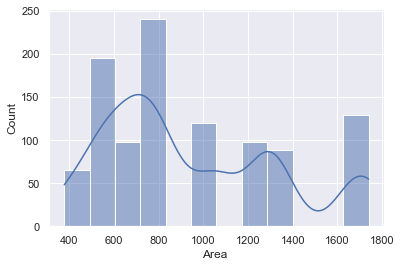

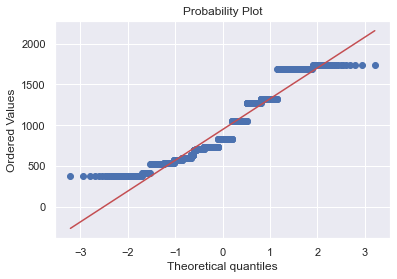

In [87]:
##same thing for area
sns.histplot(df['Area '], kde=True)
fig = plt.figure()
res = stats.probplot(df['Area '], plot=plt)

In [88]:
df['Area '] = np.log(df['Area '])

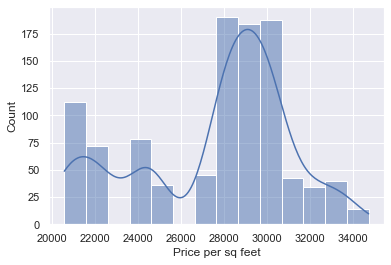

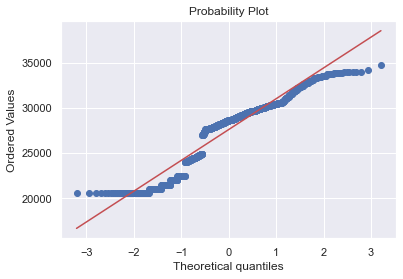

In [89]:
# same thing for Price per sq feet
# histogram and normal probability plot
sns.histplot(df['Price per sq feet'], kde=True)
fig = plt.figure()
res = stats.probplot(df['Price per sq feet'], plot=plt)

In [90]:
df['Price per sq feet'] = np.log(df['Price per sq feet'])

In [91]:
# df

* Homoscedasticity -> The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution)


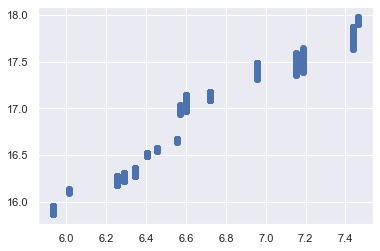

In [92]:
#scatter plot
plt.scatter(df['Area '], df['Total price (approx)'])

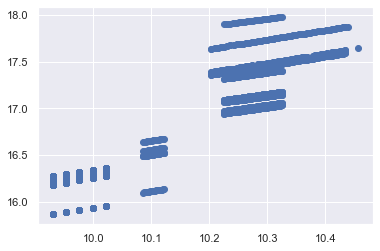

In [93]:
### price per sqft anf total sale price
plt.scatter(df['Price per sq feet'], df['Total price (approx)'])

In [94]:
df['Total price (approx)']

810     17.498015
1020    16.130296
817     17.502826
857     17.818261
356     17.469885
          ...    
200     17.114865
1021    16.670514
734     17.474137
52      15.910702
668     17.416378
Name: Total price (approx), Length: 1034, dtype: float64

#### Data Split

In [95]:
reuire_scaling = ['Area ', 'Price per sq feet', 'Closest Educational Institute Distance (m)', 'Total price (approx)']
pd.DataFrame(StandardScaler().fit_transform(df[reuire_scaling].to_numpy()), columns=reuire_scaling).set_index(df.index)

,Area,Price per sq feet,Closest Educational Institute Distance (m),Total price (approx)
810,0.919037,0.945899,0.357665,0.806323
1020,-1.790557,-0.736239,-2.674467,-1.678413
817,0.919037,0.981338,0.357665,0.815064
857,1.590615,1.224750,0.357665,1.388114
356,0.453966,0.631399,0.594550,0.755220
...,...,...,...,...
200,-0.104601,0.276979,0.594550,0.110254
1021,-0.505798,-0.736239,-2.674467,-0.696998
734,0.995938,0.531864,0.357665,0.762944
52,-1.978011,-1.773092,-0.352991,-2.077349


In [96]:

require_scaling = ['Area ', 'Price per sq feet', 'Closest Educational Institute Distance (m)', 'Total price (approx)']
df_scaled = StandardScaler().fit_transform(df[reuire_scaling].to_numpy())
require_scaling = ['Area', 'pricePerSqFt', 'closestEducationalInstituteDistance', 'totalPrice']
df_scaled = pd.DataFrame(df_scaled, columns=require_scaling)
df.drop(reuire_scaling, axis=1, inplace=True)
df = pd.concat([df, df_scaled.set_index(df.index)], axis=1)

In [97]:
df.rename(columns = {'Flat type (bhk)': 'flatType', 'Shopping area': 'shoppingArea'}, inplace=True)

In [98]:
require_scaling = ['Area', 'pricePerSqFt', 'closestEducationalInstituteDistance', 'totalPrice']


In [99]:
require_scaling

['Area', 'pricePerSqFt', 'closestEducationalInstituteDistance', 'totalPrice']

In [100]:
df[require_scaling]

,Area,pricePerSqFt,closestEducationalInstituteDistance,totalPrice
810,0.919037,0.945899,0.357665,0.806323
1020,-1.790557,-0.736239,-2.674467,-1.678413
817,0.919037,0.981338,0.357665,0.815064
857,1.590615,1.224750,0.357665,1.388114
356,0.453966,0.631399,0.594550,0.755220
...,...,...,...,...
200,-0.104601,0.276979,0.594550,0.110254
1021,-0.505798,-0.736239,-2.674467,-0.696998
734,0.995938,0.531864,0.357665,0.762944
52,-1.978011,-1.773092,-0.352991,-2.077349


In [101]:
X_feature = df[['Area', 'pricePerSqFt', 'closestEducationalInstituteDistance', 'flatType', 'shoppingArea']]

In [102]:
y_label = df['totalPrice']

In [103]:
X_feature.columns

Index(['Area', 'pricePerSqFt', 'closestEducationalInstituteDistance',
       'flatType', 'shoppingArea'],
      dtype='object')

In [104]:
y_label

810     0.806323
1020   -1.678413
817     0.815064
857     1.388114
356     0.755220
          ...   
200     0.110254
1021   -0.696998
734     0.762944
52     -2.077349
668     0.658014
Name: totalPrice, Length: 1034, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.2, random_state=42)

In [107]:
X_train.columns

Index(['Area', 'pricePerSqFt', 'closestEducationalInstituteDistance',
       'flatType', 'shoppingArea'],
      dtype='object')

#### Model Testing

* LinearRegression
* Ridge
* Lasso
* Random Forest

In [108]:
models = [LinearRegression(), Ridge(), Lasso(alpha=0.1, max_iter=10000), RandomForestRegressor(),
          GradientBoostingRegressor(), SVR(), LinearSVR(), ElasticNet(alpha=0.001, max_iter=10000)]

In [109]:
names = ['LR', 'Ridge', 'Lasso', 'RF', 'GBR', 'SVR', 'LSVR', 'ENet']

In [110]:
def rmse_cv(model, features, label):
    rmse = np.sqrt(-cross_val_score(model, features, label, scoring="neg_mean_squared_error",cv=5))
    return rmse

In [111]:
for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}: {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR: 0.085658, 0.005276
Ridge: 0.085960, 0.005155
Lasso: 0.169391, 0.011868
RF: 0.050376, 0.004660


GBR: 0.043304, 0.003431
SVR: 0.074324, 0.003522
LSVR: 0.090394, 0.005666
ENet: 0.085936, 0.005255


c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin,clone


In [113]:
# To define the average weight

class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self, model, weight):
        self.model = model
        self.weight = weight
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.model]
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
         # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single)) 
        return w
        

In [114]:
lasso = Lasso(alpha= 0.0005, max_iter= 10000)
ridge = Ridge(alpha=45, max_iter= 10000)
svr = SVR(C = 0.2, epsilon= 0.025, gamma = 0.0004, kernel = 'rbf')
ker = KernelRidge(alpha=0.15 ,kernel='polynomial',degree=3 , coef0=0.9)
ela = ElasticNet(alpha=0.0065,l1_ratio=0.075,max_iter=10000)
bay = BayesianRidge()

In [115]:
# Assign weights to all the above 6 models
w1 = 0.047
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.003
w6 = 0.2

weight_avg = AverageWeight(model = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])
score = rmse_cv(weight_avg,X_train,y_train)
print(score.mean())

0.21524806869110788


In [116]:
import joblib

In [117]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean
    
    def save_model(self, filename):
        """
        Save the stacking ensemble model to a file.

        Parameters:
        - filename (str): The name of the file to save the model.
        """
        joblib.dump(self, filename)
        
    @classmethod
    def load_model(cls, filename):
        """
        Load the stacking ensemble model from a file.

        Parameters:
        - filename (str): The name of the file containing the saved model.

        Returns:
        - Stacking: The loaded stacking ensemble model.
        """
        return joblib.load(filename)
    
    

In [118]:
pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.1
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
Note: you may need to restart the kernel to use updated packages.
anyio @ file:///C:/ci/anyio_1620153135622/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
arrow @ file:///C:/ci/arrow_1617738834352/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1629829318700/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1620866417880/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_

In [119]:
from sklearn.impute import SimpleImputer

jupyter-client @ file:///tmp/build/80754af9/jupyter_client_1616770841739/work
jupyter-console @ file:///tmp/build/80754af9/jupyter_console_1616615302928/work
jupyter-core @ file:///C:/ci/jupyter_core_1633420716440/work
jupyter-server @ file:///C:/ci/jupyter_server_1616084298419/work
jupyterlab @ file:///tmp/build/80754af9/jupyterlab_1635799997693/work
jupyterlab-pygments @ file:///tmp/build/80754af9/jupyterlab_pygments_1601490720602/work
jupyterlab-server @ file:///tmp/build/80754af9/jupyterlab_server_1633419203660/work
jupyterlab-widgets @ file:///tmp/build/80754af9/jupyterlab_widgets_1609884341231/work
keyring @ file:///C:/ci/keyring_1629321702436/work
kiwisolver @ file:///C:/ci/kiwisolver_1612282555033/work
lazy-object-proxy @ file:///C:/ci/lazy-object-proxy_1616529288960/work
libarchive-c @ file:///tmp/build/80754af9/python-libarchive-c_1617780486945/work
llvmlite==0.37.0
locket==0.2.1
lxml @ file:///C:/ci/lxml_1616443418777/work
MarkupSafe @ file:///C:/ci/markupsafe_1607027406824/

In [120]:
X_scaled_imputed = SimpleImputer().fit_transform(X_train)
y_log_imputed = SimpleImputer().fit_transform(y_train.values.reshape(-1,1)).ravel()

In [121]:
for model,name in zip(models,names):
    score = rmse_cv(model,X_scaled_imputed,y_log_imputed)
    print("{}: {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR: 0.085658, 0.005276
Ridge: 0.085960, 0.005155
Lasso: 0.169391, 0.011868


RF: 0.050223, 0.004820
GBR: 0.043304, 0.003431
SVR: 0.074324, 0.003522
LSVR: 0.091002, 0.005411
ENet: 0.085936, 0.005255


c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

In [122]:
X_test_scaled = SimpleImputer().fit_transform(X_test)
y_test_log_imputed = SimpleImputer().fit_transform(y_test.values.reshape(-1, 1)).ravel()

In [123]:
X_scaled_imputed

array([[ 0.45396601,  0.32866642,  0.59455007,  3.        ,  1.        ],
       [-0.10460111,  0.80241171,  0.59455007,  2.        ,  1.        ],
       [ 1.59061475,  1.12141436,  0.35766476,  3.        ,  1.        ],
       ...,
       [-1.2195137 , -1.77309169, -0.3529912 ,  2.        ,  0.        ],
       [-1.00117501, -2.10236763, -0.3529912 ,  2.        ,  0.        ],
       [ 0.91903737,  1.0517093 ,  0.35766476,  3.        ,  1.        ]])

In [124]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [125]:
score = rmse_cv(stack_model,X_scaled_imputed,y_log_imputed)

C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple.

In [126]:
print(score.mean())

0.04513668312504145


In [127]:
stack = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [128]:
stack.fit(X_scaled_imputed, y_log_imputed)

stacking(meta_model=KernelRidge(alpha=0.15, coef0=0.9, kernel='polynomial'),
         mod=[Lasso(alpha=0.0005, max_iter=10000),
              Ridge(alpha=45, max_iter=10000),
              SVR(C=0.2, epsilon=0.025, gamma=0.0004),
              KernelRidge(alpha=0.15, coef0=0.9, kernel='polynomial'),
              ElasticNet(alpha=0.0065, l1_ratio=0.075, max_iter=10000),
              BayesianRidge()])

In [129]:
stack.predict(X_test_scaled)

C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple.

array([ 1.32926005e-01, -1.57391125e+00, -1.39134202e+00,  2.00341247e-01,
       -7.74266025e-02,  1.89241339e-01,  8.55845223e-01, -7.19935656e-01,
        8.96812791e-01,  6.19933116e-01,  1.08510354e+00, -1.53552306e+00,
        7.94647028e-01, -1.29430711e+00,  1.42018025e+00, -9.84772844e-01,
       -1.43217043e+00, -1.42461013e-02, -9.56614015e-01, -1.41103828e+00,
       -1.51179712e+00,  5.84046408e-01,  1.15753819e-01,  6.92935993e-02,
        1.23943228e+00,  1.34456610e+00,  1.38620812e-01,  7.29083686e-01,
       -2.03726985e+00,  9.87740143e-01, -1.69585302e+00,  8.72301424e-01,
       -8.78246899e-01,  9.29400484e-01,  1.25820531e+00, -9.70631956e-01,
        1.72491689e-01,  1.10000052e-01, -1.57391125e+00, -9.19940291e-01,
        8.55217560e-01,  7.34826584e-01, -2.94439248e-03,  6.96104972e-01,
        1.66881370e-01, -7.74266025e-02,  7.69189091e-01,  1.38620812e-01,
        1.09499179e+00, -9.56614015e-01,  6.96104972e-01, -1.51179712e+00,
       -9.91890277e-01,  

In [130]:
y_predict = stack.predict(X_test_scaled)

C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple.

In [131]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_log_imputed, y_predict)

0.0016949986373829345

In [132]:
import joblib

In [133]:
stack.save_model("stacking_model.joblib")

In [134]:
loaded_model = stack.load_model("stacking_model.joblib")

In [135]:
X_test_scaled.shape

(207, 5)

In [136]:
predictions = loaded_model.predict(X_test_scaled)

C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) for single_model in self.saved_model])
C:\Users\HP\AppData\Local\Temp/ipykernel_17384/3285686181.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple.

In [137]:
from sklearn.metrics import mean_squared_error

In [138]:
mse = mean_squared_error(y_test_log_imputed, predictions)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.0016949986373829345
